In [671]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [672]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from google.colab import files
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.utils import shuffle

In [673]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project/train.csv')
df.shape

(27999, 12)

In [674]:
df=pd.DataFrame(df)
df.head(10)

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,1/1/2018 0:15,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,2,1/1/2018 0:30,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,3,1/1/2018 0:45,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,4,1/1/2018 1:00,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,5,1/1/2018 1:15,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82
5,6,1/1/2018 1:30,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load,3.28
6,7,1/1/2018 1:45,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load,3.60
7,8,1/1/2018 2:00,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load,3.60
8,9,1/1/2018 2:15,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load,3.28
9,10,1/1/2018 2:30,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load,3.78


In [675]:
df.isnull().sum()

Id                                         0
date                                       0
Lagging_Current_Reactive.Power_kVarh       0
Leading_Current_Reactive_Power_kVarh     119
CO2(tCO2)                                  0
Lagging_Current_Power_Factor               0
Leading_Current_Power_Factor              76
NSM                                        0
WeekStatus                              1774
Day_of_week                             1774
Load_Type                                  0
Usage_kWh                                  0
dtype: int64

In [676]:
#Separating The Features From The Target
features=df.drop(['Usage_kWh','Id'],axis=1,inplace=False)
target=df['Usage_kWh']
numerical_features=df[['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']]
categorical_features=df['Load_Type']

In [677]:
# Dividing date column
# df['date']=pd.to_datetime(df['date'])

# df['Year']=df['date'].dt.year
# df['Month']=df['date'].dt.month
# df['Day']=df['date'].dt.day
# df['Hour and Minute']=df['date'].dt.strftime('%H:%M')

# df.drop('date',axis=1,inplace=True)
# df['Year'].value_counts().head(20)

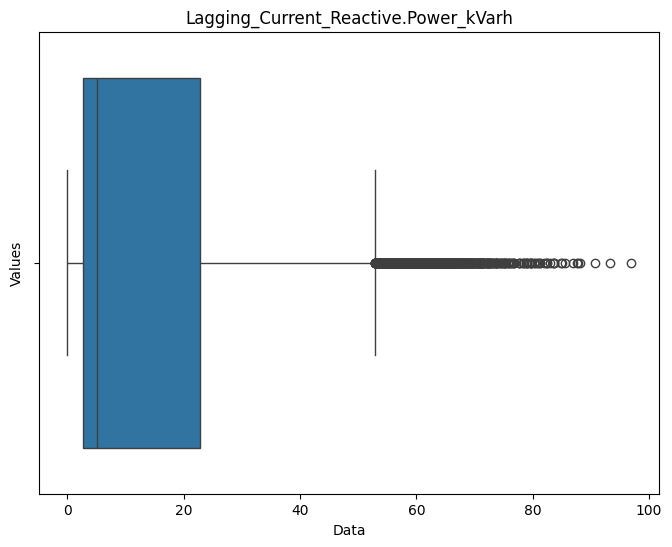

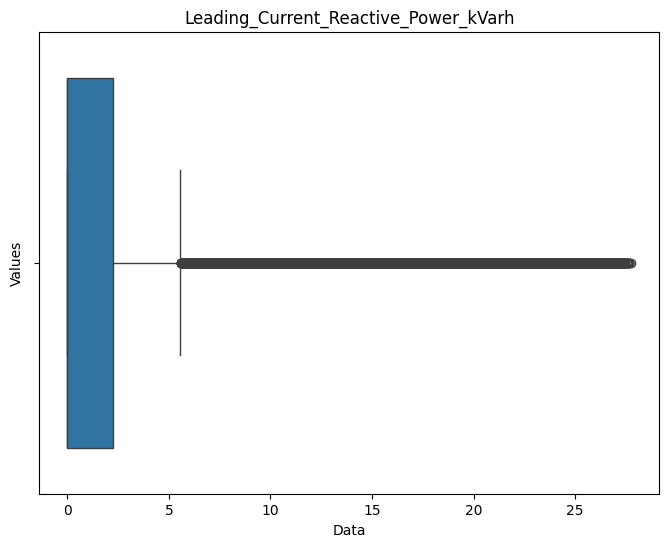

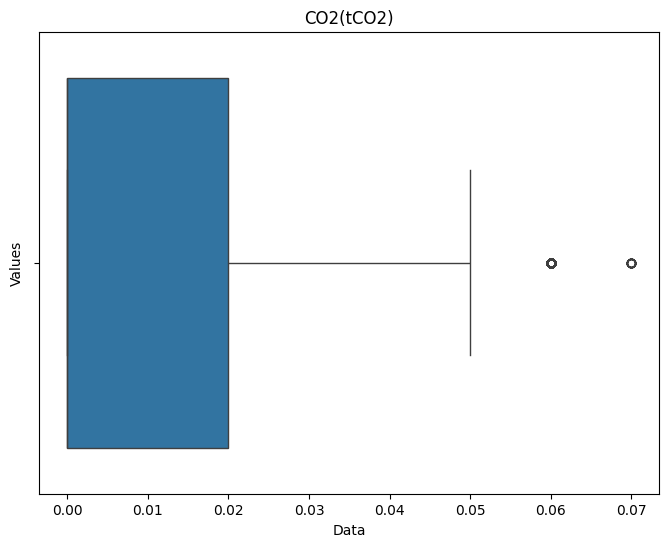

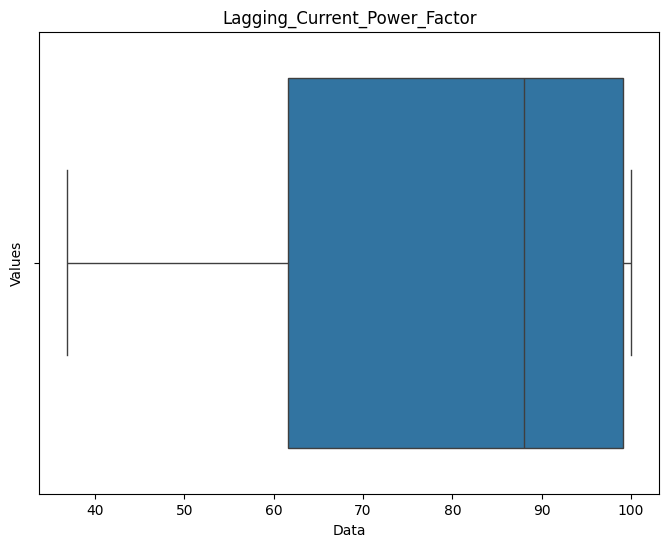

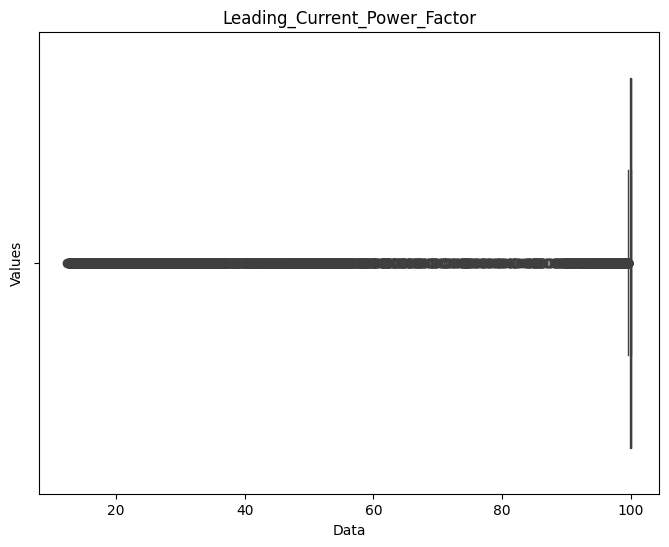

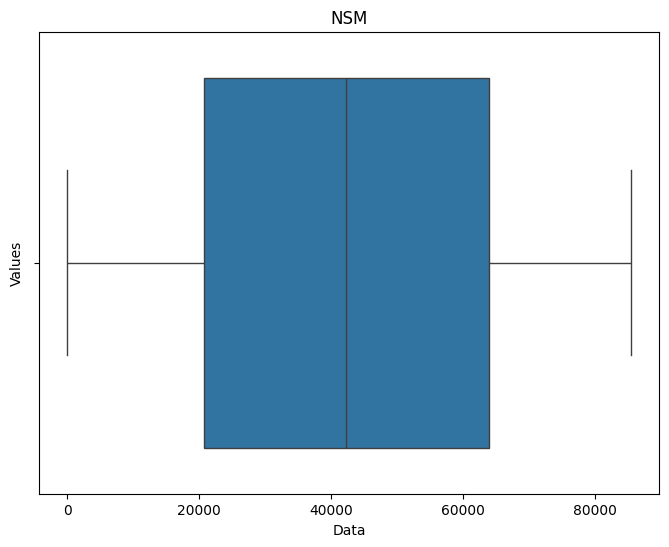

In [678]:
#Detecting Outliers
for i in numerical_features:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=numerical_features[i])

  #Showing the plot
  plt.xlabel('Data')
  plt.ylabel('Values')
  plt.title(numerical_features[i].name)

  plt.show()

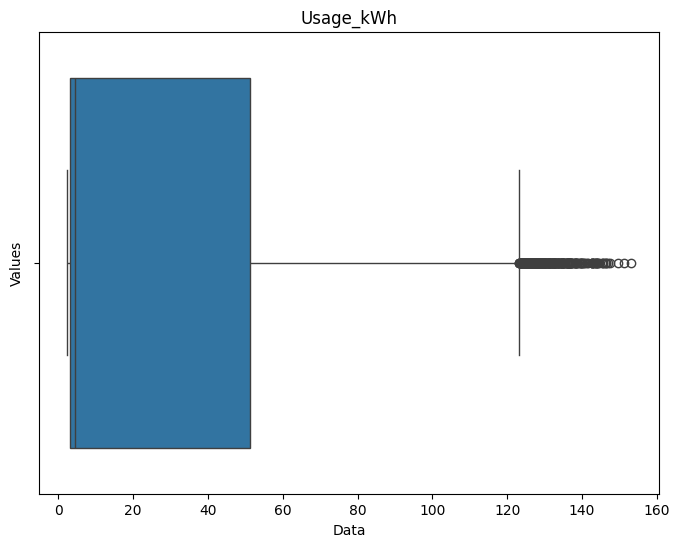

In [679]:
plt.figure(figsize=(8,6))
sns.boxplot(x=target)

#Showing the plot
plt.xlabel('Data')
plt.ylabel('Values')
plt.title(target.name)

plt.show()

In [680]:
#Replacing the outliers with the mean of each feature
def outlier_removal(df,threshold,column):
  if column=='Leading_Current_Power_Factor':
    mean=df[column].mean()
    outliers=df[df[column]<threshold]
    outliers=outliers.copy()
    outliers[column]=mean
    df.loc[outliers.index,column]=outliers[column]

    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[column])
    plt.xlabel('Data')
    plt.ylabel('Values')
    plt.title(f'{column} after outliers removal: ')


  else:
    mean=df[column].mean()
    outliers=df[df[column]>threshold]
    outliers=outliers.copy()
    outliers[column]=mean
    df.loc[outliers.index,column]=outliers[column]

    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[column])
    plt.xlabel('Data')
    plt.ylabel('Values')
    plt.title(f'{column} after outliers removal: ')



In [681]:
# numerical_features['Leading_Current_Power_Factor'].value_counts().head(20)

In [682]:
# thresholds={'Lagging_Current_Reactive.Power_kVarh':28,'Leading_Current_Reactive_Power_kVarh':5,'CO2(tCO2)':0.05,'Leading_Current_Power_Factor':99.82}
# for column,threshold in thresholds.items():

#   outlier_removal(numerical_features,threshold,column)

In [683]:
numerical_features.isnull().sum()

Lagging_Current_Reactive.Power_kVarh      0
Leading_Current_Reactive_Power_kVarh    119
CO2(tCO2)                                 0
Lagging_Current_Power_Factor              0
Leading_Current_Power_Factor             76
NSM                                       0
dtype: int64

In [684]:
#Filling missing values in numerical features
Imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
numerical_features.iloc[:, :]=pd.DataFrame(Imputer.fit_transform(numerical_features.iloc[:,:]))
numerical_features.isnull().sum()

<ipython-input-684-646d7f763b64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features.iloc[:, :]=pd.DataFrame(Imputer.fit_transform(numerical_features.iloc[:,:]))
<ipython-input-684-646d7f763b64>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  numerical_features.iloc[:, :]=pd.DataFrame(Imputer.fit_transform(numerical_features.iloc[:,:]))


Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
dtype: int64

In [685]:
#Encoding Categorical Features
labelencoder=LabelEncoder()
encoded_categorical_features=pd.DataFrame(labelencoder.fit_transform(categorical_features))

categorical_features=pd.DataFrame(categorical_features)
encoded_categorical_features.columns=categorical_features.columns
encoded_categorical_features.value_counts().tail(20)

Load_Type
0            14364
2             7784
1             5851
dtype: int64

In [686]:
prescaling_features=pd.DataFrame(pd.concat([numerical_features,encoded_categorical_features],axis=1,ignore_index=False))

In [687]:
prescaling_features.columns=prescaling_features.columns.astype(str)           #Necessary after using Label Encoder instead of One Hot Encoder

In [688]:
#splitting the data into training and validation sets
x_train,x_val,y_train,y_val=train_test_split(prescaling_features,target,test_size=0.2,random_state=1)


#Normalizing the data using Standard Scaler
scaler=StandardScaler()
x_scaled_train=scaler.fit_transform(x_train)
x_scaled_val=scaler.transform(x_val)
x_scaled_train=pd.DataFrame(x_scaled_train)
# x_scaled_train.head(10)

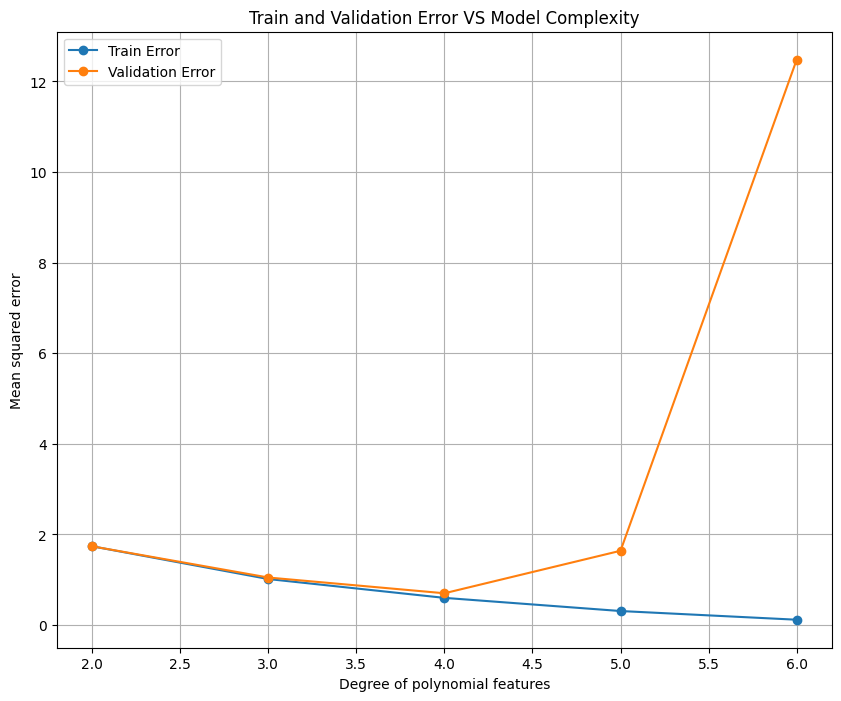

Best Degree: 2, Minimum Difference: 0.0014181607539009988


In [689]:
#Applying polynomial regression model
train_errors=[]
val_errors=[]

degrees=range(2,7)

min_diff=float('inf')
best_degree=None

#Creating polynomial features
for degree in degrees:
  poly=PolynomialFeatures(degree=degree)
  x_scaled_train=pd.DataFrame(x_scaled_train)
  x_poly_train=poly.fit_transform(x_scaled_train)
  x_poly_val=poly.transform(x_scaled_val)


  #Fitting the linear regression model
  lin=LinearRegression()
  lin.fit(x_poly_train,y_train)

  #Calculating train error
  y_pred_train=lin.predict(x_poly_train)
  train_error=mean_squared_error(y_train,y_pred_train)
  train_errors.append(np.log1p(train_error))

  #Calculating validation error
  y_pred_val=lin.predict(x_poly_val)
  val_error=mean_squared_error(y_val,y_pred_val)
  val_errors.append(np.log1p(val_error))

  #Determining the best degree of polynomial features
  diff=abs(val_error-train_error)
  if diff<min_diff:
    min_diff=diff
    best_degree=degree


#Visualizing the error
plt.figure(figsize=(10,8))
plt.plot(degrees,train_errors,label='Train Error',marker='o')
plt.plot(degrees,val_errors,label='Validation Error',marker='o')
plt.xlabel('Degree of polynomial features')
plt.ylabel('Mean squared error')
plt.title('Train and Validation Error VS Model Complexity')
plt.legend()
plt.grid(True)
# plt.savefig('plot without outliers in target.png')
# files.download('plot without outliers.png')
plt.show()

print(f'Best Degree: {best_degree}, Minimum Difference: {min_diff}')

In [690]:
#Scores of best degree of Polynomial Regression
poly=PolynomialFeatures(degree=best_degree)
x_poly_train=poly.fit_transform(x_scaled_train)
x_poly_val=poly.transform(x_scaled_val)

lin.fit(x_poly_train,y_train)

y_pred_train=lin.predict(x_poly_train)
y_pred_val=lin.predict(x_poly_val)

score1=r2_score(y_train,y_pred_train)
score2=r2_score(y_val,y_pred_val)
rmse=mean_squared_error(y_val,y_pred_val,squared=False)
mae=mean_absolute_error(y_val,y_pred_val)

print('best degree: ',best_degree)
print('training scores: ',score1)
print('validation scores: ',score2)
print('Root Mean Square Error: ',rmse)
print('Mean Absolute Error: ',mae)

best degree:  2
training scores:  0.9959055219366926
validation scores:  0.9959978725418385
Root Mean Square Error:  2.1649750632893268
Mean Absolute Error:  1.2576395553596138


In [691]:
#Applying Linear Regression Model
reg=LinearRegression()
reg.fit(x_scaled_train,y_train)

y_pred_train=reg.predict(x_scaled_train)
y_pred_val=reg.predict(x_scaled_val)

score1=r2_score(y_train,y_pred_train)
score2=r2_score(y_val,y_pred_val)
rmse=mean_squared_error(y_val,y_pred_val,squared=False)
mae=mean_absolute_error(y_val,y_pred_val)

print('training scores: ',score1)
print('validation scores: ',score2)
print('Root Mean Square Error: ',rmse)
print('Mean Absoulute Error: ',mae)

training scores:  0.9779215279761175
validation scores:  0.9822807990631915
Root Mean Square Error:  4.5554313587909565
Mean Absoulute Error:  2.64122686744489


In [692]:
#Applying Lasso Regression
lasso_regression=linear_model.Lasso(alpha=0.1)
lasso_regression.fit(x_poly_train,y_train)

score1=lasso_regression.score(x_poly_train,y_train)
score2=lasso_regression.score(x_poly_val,y_val)
rmse=mean_squared_error(y_val,y_pred_val,squared=False)
mae=mean_absolute_error(y_val,y_pred_val)

print('training scores: ',score1)
print('validation scores: ',score2)
print('Root Mean Square Error: ',rmse)
print('Mean Absoulute Error: ',mae)

training scores:  0.9938155111058923
validation scores:  0.9943669710275295
Root Mean Square Error:  4.5554313587909565
Mean Absoulute Error:  2.64122686744489


In [693]:
#Applying Ridge Regression
ridge_regression=linear_model.Ridge(alpha=0.5)

ridge_regression.fit(x_poly_train,y_train)

y_pred_train=ridge_regression.predict(x_poly_train)
y_pred_val=ridge_regression.predict(x_poly_val)

score1=r2_score(y_train,y_pred_train)
score2=r2_score(y_val,y_pred_val)
rmse=mean_squared_error(y_val,y_pred_val,squared=False)
mae=mean_absolute_error(y_val,y_pred_val)

print('training scores: ',score1)
print('validation scores: ',score2)
print('Root Mean Square Error: ',rmse)
print('Mean Absoulute Error: ',mae)

training scores:  0.9959045762827663
validation scores:  0.9959982706427086
Root Mean Square Error:  2.164867383074272
Mean Absoulute Error:  1.2572947295679362


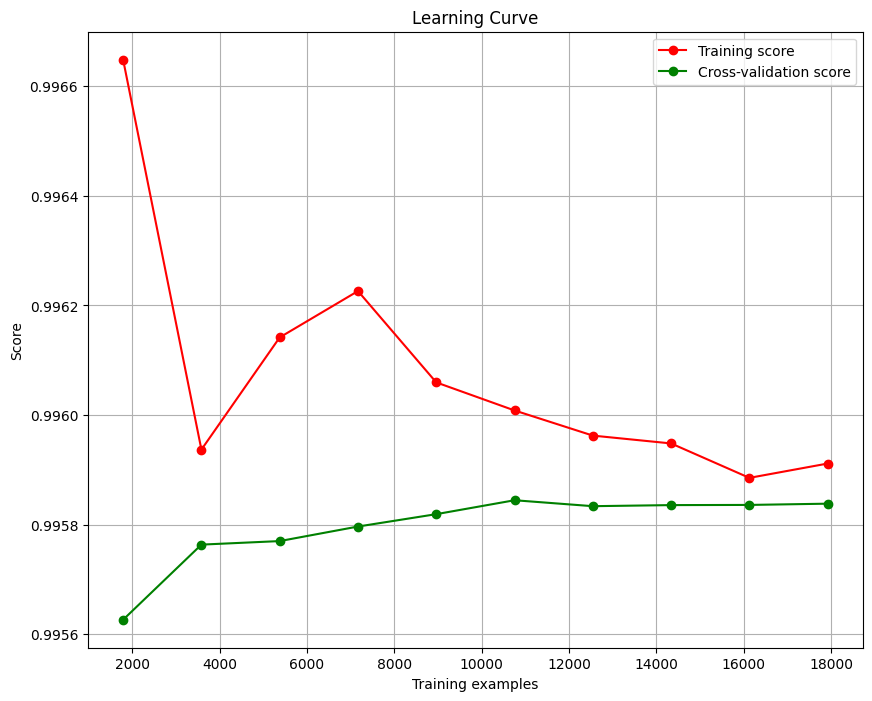

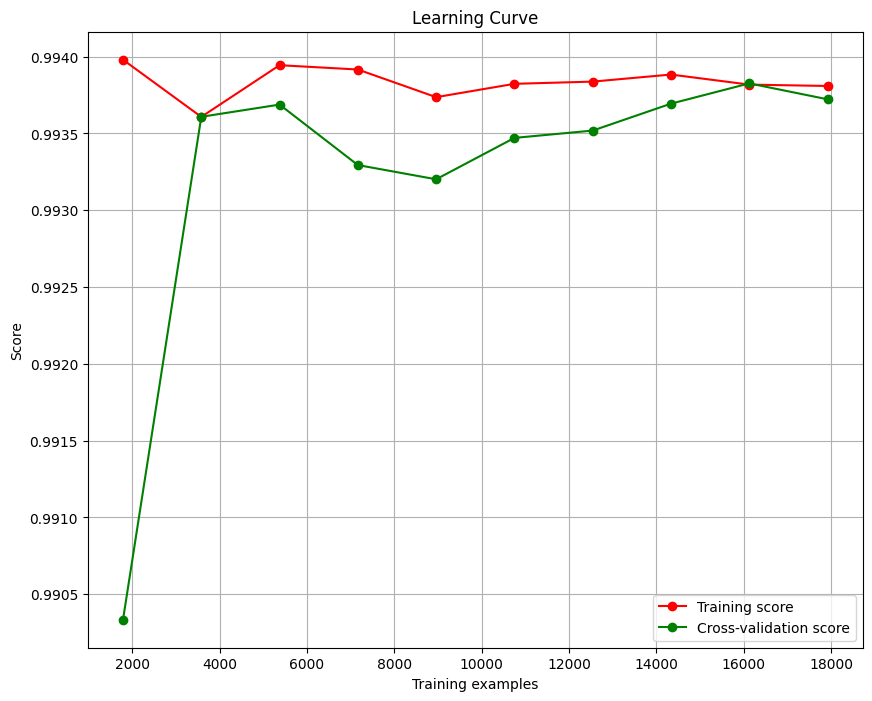

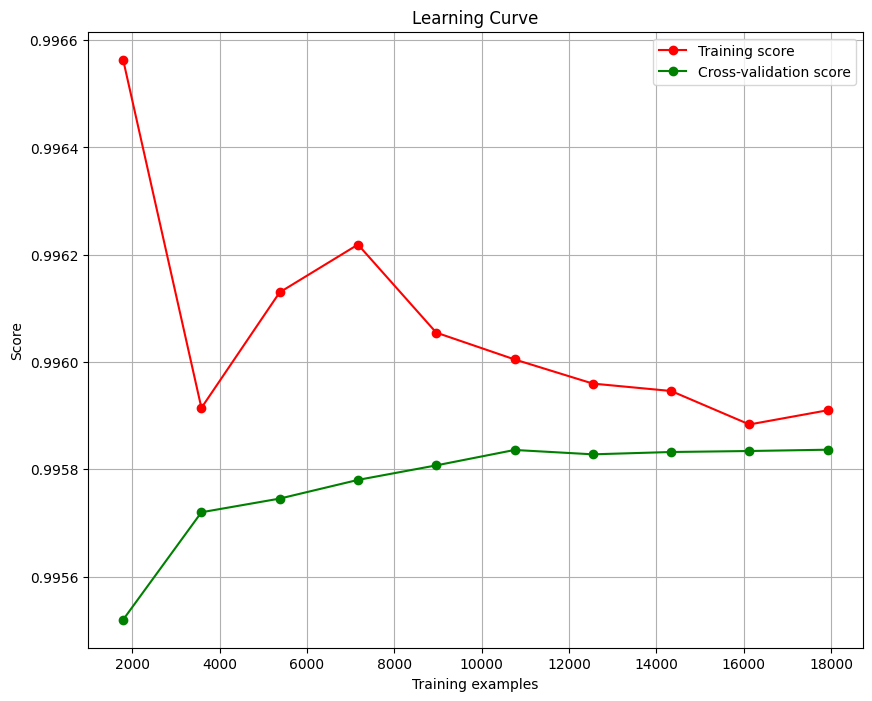

In [694]:
models=[lin,lasso_regression,ridge_regression]
# Learning curve
for model in models:
  train_sizes, train_scores, test_scores = learning_curve(
      model, x_poly_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
  )

  # Plot learning curve
  plt.figure(figsize=(10,8))
  plt.title("Learning Curve")
  plt.xlabel("Training examples")
  plt.ylabel("Score")

  # Plot mean training and test scores
  train_scores_mean = np.mean(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  plt.grid()

  plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

  plt.legend(loc="best")

  plt.show()

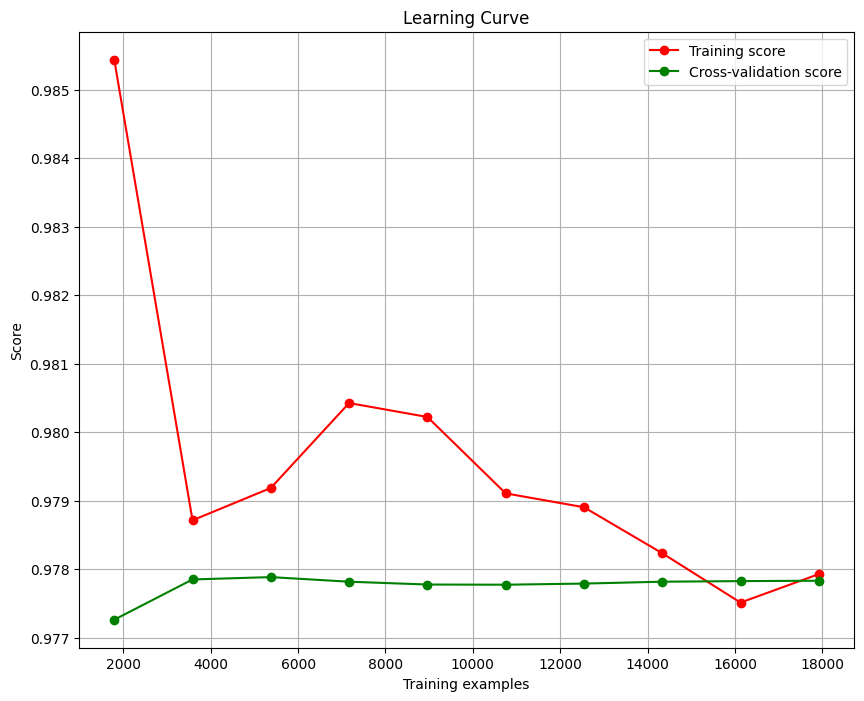

In [695]:
models=[reg]
# Learning curve
for model in models:
  train_sizes, train_scores, test_scores = learning_curve(
      model, x_scaled_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
  )

  # Plot learning curve
  plt.figure(figsize=(10,8))
  plt.title("Learning Curve")
  plt.xlabel("Training examples")
  plt.ylabel("Score")

  # Plot mean training and test scores
  train_scores_mean = np.mean(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  plt.grid()

  plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

  plt.legend(loc="best")

  plt.show()

In [696]:
#Applying grid search and cross validation on Linear Regression
model=LinearRegression()

param_grids={'fit_intercept':[True,False], 'positive':[True,False]}
gridsearch=GridSearchCV(model,param_grids,cv=5,scoring='r2')
gridsearch.fit(x_poly_train,y_train)

#The best parameters and their corresponding scores
print('Best parameters: ', gridsearch.best_params_)
print('Best score: ', gridsearch.best_score_)


y_pred_train=gridsearch.predict(x_poly_train)
y_pred_val=gridsearch.predict(x_poly_val)


score1=r2_score(y_train,y_pred_train)
score2=r2_score(y_val,y_pred_val)
rmse=mean_squared_error(y_val,y_pred_val,squared=False)
mae=mean_absolute_error(y_val,y_pred_val)

print('training scores: ',score1)
print('validation scores: ',score2)
print('Root Mean Square Error: ',rmse)
print('Mean Absoulute Error: ',mae)

Best parameters:  {'fit_intercept': True, 'positive': False}
Best score:  0.9958384022264187
training scores:  0.9959055219366926
validation scores:  0.9959978725418385
Root Mean Square Error:  2.1649750632893268
Mean Absoulute Error:  1.2576395553596138


In [697]:
#Applying Grid Search and Cross Validation on Lasso Regression
model=linear_model.Lasso()
param_grids={'alpha':[0.1,0.2,0.3,0.4,0.5]}

gridsearch=GridSearchCV(model,param_grids,cv=5,scoring='r2')

gridsearch.fit(x_poly_train,y_train)

print("Best parameters: ",gridsearch.best_params_)
print("Best Score: ", gridsearch.best_score_)

y_pred_train=gridsearch.predict(x_poly_train)
y_pred_val=gridsearch.predict(x_poly_val)

score1=r2_score(y_train,y_pred_train)
score2=r2_score(y_val,y_pred_val)
rmse=mean_squared_error(y_val,y_pred_val,squared=False)
mae=mean_absolute_error(y_val,y_pred_val)

print('training scores: ',score1)
print('validation scores: ',score2)
print('Root Mean Square Error: ',rmse)
print('Mean Absoulute Error: ',mae)

Best parameters:  {'alpha': 0.1}
Best Score:  0.9937226758323137
training scores:  0.9938155111058923
validation scores:  0.9943669710275295
Root Mean Square Error:  2.5684932752634038
Mean Absoulute Error:  1.4374345956520729


In [698]:
#Applying Grid Search and Cross Validation on Ridge Regression
model=linear_model.Ridge()

param_grids={'alpha':[0.1,0.2,0.3,0.4,0.5]}

gridsearch=GridSearchCV(model,param_grids,cv=5,scoring='r2')

gridsearch.fit(x_poly_train,y_train)

y_pred_train=gridsearch.predict(x_poly_train)
y_pred_val=gridsearch.predict(x_poly_val)

score1=r2_score(y_train,y_pred_train)
score2=r2_score(y_val,y_pred_val)
rmse=mean_squared_error(y_val,y_pred_val,squared=False)
mae=mean_absolute_error(y_val,y_pred_val)

print('Best Parameter: ', gridsearch.best_params_)
print('Best Score: ', gridsearch.best_score_)
print('training scores: ',score1)
print('validation scores: ',score2)
print('Root Mean Square Error: ',rmse)
print('Mean Absoulute Error: ',mae)

Best Parameter:  {'alpha': 0.1}
Best Score:  0.9958382815030451
training scores:  0.9959054813815552
validation scores:  0.9959980910359519
Root Mean Square Error:  2.164915964626363
Mean Absoulute Error:  1.257550282788366


In [699]:
df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project/test.csv')

test=df2.drop(['Id','WeekStatus','Day_of_week','date'],axis=1)

In [700]:
test['Load_Type']=pd.DataFrame(labelencoder.transform(test['Load_Type']))

In [701]:
test_scaled=scaler.transform(test)

y_pred_test=reg.predict(test_scaled)
y_pred_test=pd.DataFrame(y_pred_test)
y_pred_test.head(10)

,0
0,108.756667
1,89.366846
2,89.650199
3,66.931242
4,66.649856
5,48.444886
6,44.794928
7,25.457269
8,26.955807
9,48.512843


In [702]:
test_poly=poly.transform(test_scaled)
test_pred=pd.DataFrame(lin.predict(test_poly))
target=pd.DataFrame(target)
test_pred.columns=target.columns
test_pred.head(10)
predictions=pd.DataFrame(pd.concat([df2['Id'],test_pred],axis=1,ignore_index=False))

predictions.to_csv('predictions.csv',index=False)
files.download('predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>